In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### CNN要(28,28,1)

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
x_train[1234].shape ##確認一下

(28, 28, 1)

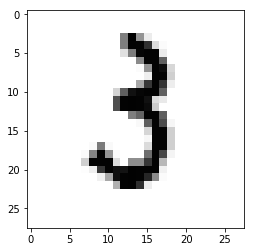

In [8]:
X = x_train[1234]
X = X.reshape(28, 28)
plt.imshow(X,  cmap='Greys')  ##如果要畫圖要改回(28,28)

In [9]:
from keras.utils import np_utils

### one-hot encoding

In [10]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[1234] #確認有改好

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 正規化

In [12]:
x_train = x_train/255
x_test = x_test/255   #因為0~255，所以直接除255就可以了

### 設計CNN，Filter數量要越來越多(一開始數量通常也是2的倍數)，後續數量2倍增加

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten  #Flatten 把矩陣拉平
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta

### Conv裡面要決定 Filter的數量，Filter的大小N*N ，$padding$ 為矩陣外要補 0的個數，$same$ 為輸出的矩陣大小跟原來一樣(28 x 28)，比上課時多增加一層Convolution

In [17]:
model = Sequential()

##第一次 Convolution!
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1))) 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))  ##Convolution 之後要接 Maxpooling 才算是一層 

##第二次 Convolution!
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

##第三次 Convolution!
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

##第四次 Convolution!
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

### 用Flatten把矩陣拉平，送進去最後一層一般的神經網路

In [18]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

### 輸出成10維向量

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))  ##softmax讓輸出結果加起來=1         

### compile，並且更改loss founction為"categorical_crossentropy"，更改optimizer為"Adadelta"

In [20]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adadelta(lr=0.07),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [21]:
model_1=model.fit(x_train, y_train, batch_size=100, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 26s 430us/step - loss: 1.4176 - acc: 0.52100s - loss: 1.4331 - acc: 
Epoch 2/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.4048 - acc: 0.8802
Epoch 3/20
60000/60000 [==============================] - 26s 437us/step - loss: 0.2983 - acc: 0.9138
Epoch 4/20
60000/60000 [==============================] - 26s 430us/step - loss: 0.2619 - acc: 0.9253
Epoch 5/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.2384 - acc: 0.9315
Epoch 6/20
60000/60000 [==============================] - 27s 449us/step - loss: 0.2194 - acc: 0.9366
Epoch 7/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.2038 - acc: 0.9417
Epoch 8/20
60000/60000 [==============================] - 26s 426us/step - loss: 0.1910 - acc: 0.9446
Epoch 9/20
60000/60000 [==============================] - 26s 431us/step - loss: 0.1806 - acc: 0.9471
Epoch 10/

### 繪出正確率與epoch的關係圖

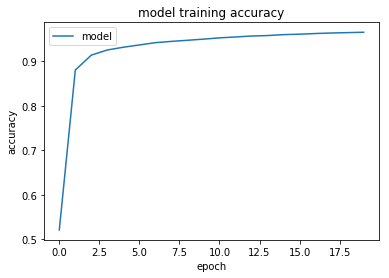

In [23]:
plt.plot(model_1.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') #訓練次數
plt.legend(['model'],loc='best')
plt.show()

### 正確率有96.37

In [27]:
score = model.evaluate(x_test, y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1]*100)

10000/10000 [==============================] - 3s 260us/step
測試資料的 loss: 0.12167172296568751
測試資料正確率: 96.37


### 存檔

In [30]:
model_json=model.to_json()
open('first_cnnmodel_mnist.json','w').write(model_json)
model.save_weights('first_cnnmodel_mnist_weights.h5')